### Введение.

Исходные данные:

Таблица query_1:
- `model` — модели самолета;
- `flights_amount` — количество рейсов для каждой модели самолетов `model` в сентябре 2018 года;

Таблица query_3:
- `city` — города;
- `average_flights` — среднее количество рейсов, прибывших в город `city` за день в августе 2018 года;

### Шаг 1.

Импорт библиотек и данных, вывод общей информации о таблицах.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from io import BytesIO
import requests

In [2]:
def data_from_g_sheets(spreadsheet_id):
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    return pd.read_csv(BytesIO(r.content))

In [3]:
try:
    
    query_1 = data_from_g_sheets('1CaDK5AL75YAJhyYkR-w_AQf-qlYl6gt3jvJPmRl3gHM')
    query_3 = data_from_g_sheets('1_37IOcUs-GxdXPDdnrefBF1VJR3-YK2QPRMOeucMPY0')
        
except:
        
    query_1 = pd.read_csv('/datasets/query_1.csv')
    query_3 = pd.read_csv('/datasets/query_3.csv')    

In [4]:
display(query_1.info())
display(query_1.head(10))

display(query_3.info())
display(query_3.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [5]:
display(query_3.duplicated().sum())
display(query_3['city'].duplicated().sum())

0

0

В таблицах `query_1` и `query_3` пропуски и дубликаты отсутствуют, данные приведены к соответствующим типам.

### Шаг 2. Анализ данных.

Тор-10 городов по количеству рейсов в день:

In [6]:
query_3_top_10 = query_3.nlargest(10, 'average_flights', keep='all').round(2).reset_index(drop = True)
display(query_3_top_10)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


График "Модели самолетов и количество рейсов (за сентябрь 2018г)".

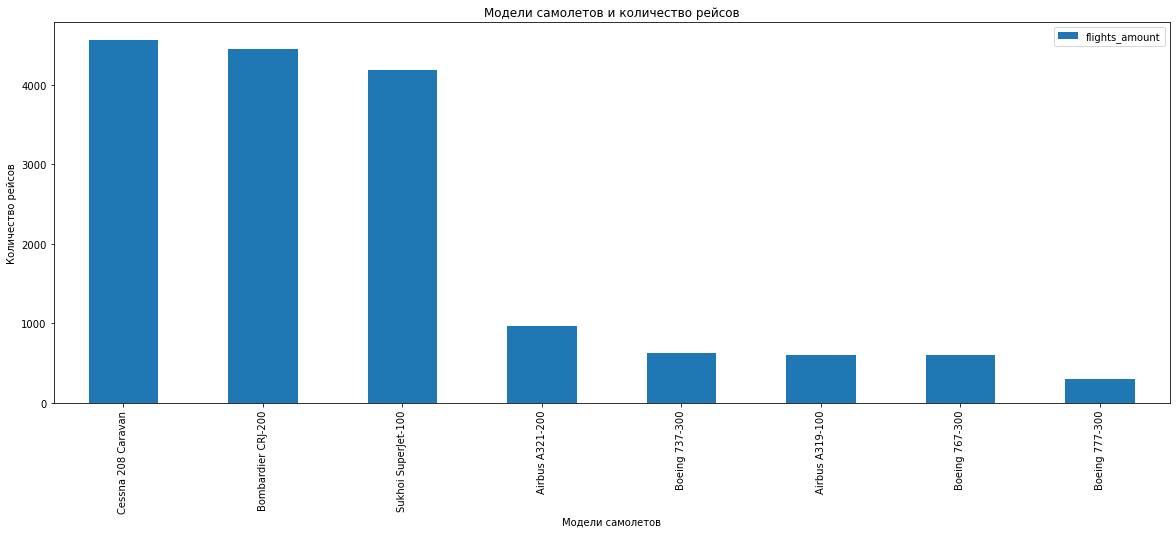

In [7]:
query_1.sort_values('flights_amount', ascending = False).plot.bar(x = 'model', y = 'flights_amount', figsize = (20, 7))
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Модели самолетов')
plt.ylabel('Количество рейсов')
plt.show()

В соответствии с графиком "Модели самолетов и количество рейсов (за сентябрь 2018г)" можно сделать вывод, что наибольшее количество рейсов выполнялись самолетами таких моделей как: "Cessna 208 Caravan", "Bombardier CRJ-200" и "Sukhoi SuperJet-100". Это можно следующим. Самолеты "Bombardier CRJ-200" и "Sukhoi SuperJet-100" относятся к классу региональных самолетов, расчитанных на 30-100 пассажиров; маршруты от точки до точки, обычно в пределах одной страны или региона страны (в крупных странах (например в России)). Этот класс самолётов обычно используют региональные подразделения крупных авиакомпаний. Самолет "Cessna 208 Caravan" является самолетом общего назначения, используется на авиалиниях малой протяжённости. Наибольшее число рейсов этого самолета обусловленно, по видимому, его экономической эфективностью при эксплуатации.

График "Города и количество рейсов в день (за август 2018г)".

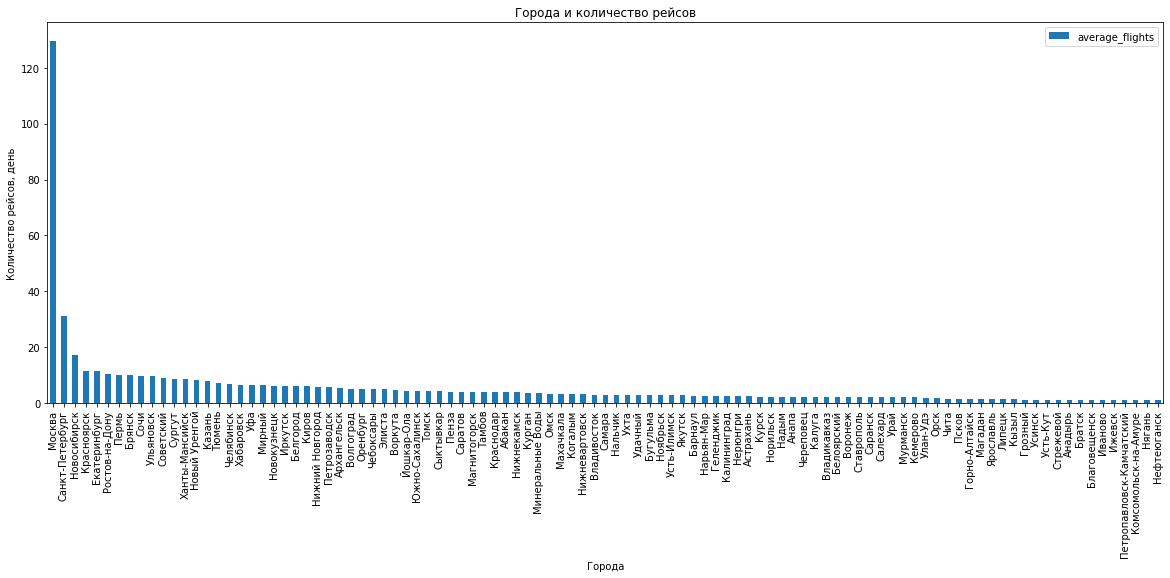

In [8]:
query_3.sort_values('average_flights', ascending = False).plot.bar(x = 'city', y = 'average_flights', figsize = (20, 7))
plt.title('Города и количество рейсов')
plt.xlabel('Города')
plt.ylabel('Количество рейсов, день')
plt.show()

Из графика "Города и количество рейсов в день (за август 2018г)" наглядно видна разница между выполненными рейсами в городе Москве и другими городами России. Так же заметна разница в рейсах относительно других в городе Санкт-Петербурге и Новосибирске.

График "Топ-10 городов и количество рейсов в день (за август 2018г)".

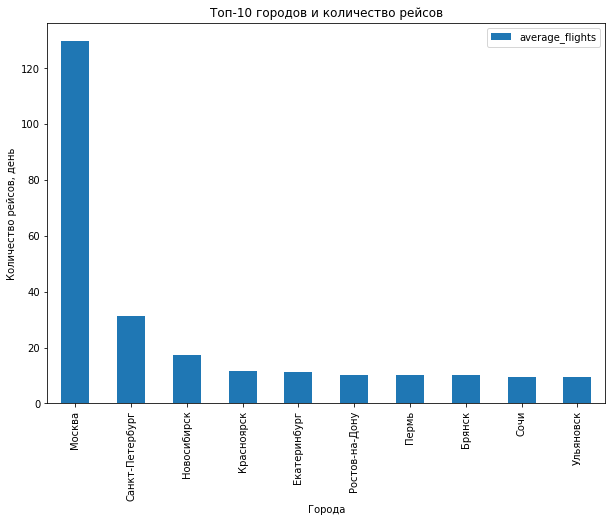

In [9]:
query_3_top_10.plot.bar(x = 'city', y = 'average_flights', figsize = (10, 7))
plt.title('Топ-10 городов и количество рейсов')
plt.xlabel('Города')
plt.ylabel('Количество рейсов, день')
plt.show()

В соответствии с графиком "Топ-10 городов и количество рейсов в день (за август 2018г)" можно сделать вывод, что полученный список городов, в целом, совпадает с рейтингом городов России по численности населения. Москва и Санкт-Петербург являются самыми крупными городами России. Затем, следует крупнейший торговый, деловой, культурный, транспортный, образовательный и научный центр Сибири - город Новосибирск. Далее, следует крупнейший культурный, образовательный, экономический и промышленный центр Восточной Сибири и Дальнего Востока - город Красноярск. И замыкает пятерку крупнейший административный, культурный, научно-образовательный центр Урала - город Екатеринбург. Так же, в "Тор-10" присутствуют такие крупные города Южного федерального округа России, как Ростов-на-Дону и Сочи.

### Шаг 5. Общий вывод:

- Наибольшее количество рейсов выполнялись самолетами таких моделей как: "Cessna 208 Caravan", "Bombardier CRJ-200" и "Sukhoi SuperJet-100". Это можно следующим. Самолеты "Bombardier CRJ-200" и "Sukhoi SuperJet-100" относятся к классу региональных самолетов, расчитанных на 30-100 пассажиров; маршруты от точки до точки, обычно в пределах одной страны или региона страны (в крупных странах (например в России)). Этот класс самолётов обычно используют региональные подразделения крупных авиакомпаний. Самолет "Cessna 208 Caravan" является самолетом общего назначения, используется на авиалиниях малой протяжённости. Наибольшее число рейсов этого самолета обусловленно, по видимому, его экономической эфективностью при эксплуатации.

- Рейтинг городов по количеству рейсов в день, в целом, совпадает с рейтингом городов России по численности населения. Москва и Санкт-Петербург являются самыми крупными городами России. Затем, следует крупнейший торговый, деловой, культурный, транспортный, образовательный и научный центр Сибири - город Новосибирск. Далее, следует крупнейший культурный, образовательный, экономический и промышленный центр Восточной Сибири и Дальнего Востока - город Красноярск. И замыкает пятерку крупнейший административный, культурный, научно-образовательный центр Урала - город Екатеринбург. Так же, в "Тор-10" присутствуют такие крупные города Южного федерального округа России, как Ростов-на-Дону и Сочи.